In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

In [69]:
v5 = pd.read_csv("Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv")

In [ ]:
cds = pd.read_excel("fullness-assessments CCDS as of Oct 13 2023.xlsx")

# Spare-it V5 scale records

## Data exploration1

In [3]:
v5.head()

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-02 12:41:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00.000,NaN,2023,1,2
1,2023-01-02 13:02:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00.000,NaN,2023,1,2
2,2023-01-02 13:53:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00.000,NaN,2023,1,2
3,2023-01-02 16:30:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00.000,NaN,2023,1,2
4,2023-01-02 16:39:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00.000,NaN,2023,1,2


In [37]:
v5.shape

(26979124, 12)

In [38]:
v5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26979124 entries, 0 to 26979123
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   createdat   object 
 1   iotid       object 
 2   hide        bool   
 3   bin         object 
 4   errorcode   object 
 5   weight      float64
 6   battery     float64
 7   updatedat   object 
 8   weightdiff  float64
 9   year        int64  
 10  month       int64  
 11  day         int64  
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 2.2+ GB


In [39]:
v5.isna().sum()

createdat            0
iotid                0
hide                 0
bin                  0
errorcode            0
weight               0
battery              0
updatedat            0
weightdiff    26979124
year                 0
month                0
day                  0
dtype: int64

In [ ]:
v5.describe()

,weight,battery,weightdiff,year,month,day
count,2.697912e+07,2.697912e+07,0.0,26979124.0,2.697912e+07,2.697912e+07
mean,3.965010e+03,2.891115e+03,NaN,2023.0,5.119058e+00,1.541971e+01
std,7.578254e+03,1.583904e+02,NaN,0.0,2.526648e+00,8.707518e+00
min,-1.000000e+05,1.334859e+03,NaN,2023.0,1.000000e+00,1.000000e+00
25%,7.644770e+02,2.860304e+03,NaN,2023.0,3.000000e+00,8.000000e+00
50%,2.128634e+03,2.917983e+03,NaN,2023.0,5.000000e+00,1.500000e+01
75%,4.618906e+03,2.974899e+03,NaN,2023.0,7.000000e+00,2.300000e+01
max,1.000000e+05,3.251240e+03,NaN,2023.0,1.000000e+01,3.100000e+01


In [ ]:
createdat_count = np.unique(v5.createdat, return_counts=True)
createdat_count[1][:5]
# Each record has a different number of creation timestamps

array([24, 24, 14, 20, 18], dtype=int64)

In [ ]:
v5.bin.value_counts().sort_values(ascending=True)

cc839327-7806-49cb-8fa6-19391570065a        20
fc67ba54-64df-47ac-bd15-019414ba2483       101
1595ad8a-7fbe-487f-88e1-f25001a0becd       102
578aa921-5dfb-4a95-a97e-a96b88b0ad4b       192
a68ab306-a1c9-467d-a1dd-f080e675b45c       231
                                         ...  
d76953e9-3f48-4900-8c12-1b85a777360f    271038
8c9ae9cf-89ba-4dc4-95a6-cacba215b27a    274660
e89c0fc0-e814-4bb7-884a-b8cc1345a4ce    377254
95171614-b019-4eb9-b726-0af6674a9451    445484
09b1ece7-5aaa-4c66-a89a-ac6a99bae6ed    468728
Name: bin, Length: 1188, dtype: int64

In [ ]:
cols = ['iotid','bin']
v5.groupby(cols).size()
# the number of records for each bin is different
# iotid and bin do not have a one-to-one correspondence.

iotid        bin                                 
lora-000014  65fdffd5-af50-4157-adfa-582251a1b27d    19136
lora-000015  4f56d445-de55-4578-86bc-9a61bceb2c7a    21459
lora-000017  d08c0976-ceb0-4bf3-8d54-23e21eb5e28a    19087
lora-000051  e8324a97-0523-44aa-a4a4-3e9aae344d24    44400
lora-000052  9513caf9-ea3a-4486-8e94-59ce2094c73c    21360
                                                     ...  
lora-001802  bca1fba1-5d12-484d-a1e6-fe8cad3027ab     1143
lora-001803  12a5e0fa-e9f2-4978-aba8-757f66ae5e5a     5416
lora-001815  2cfd5943-277e-4d6f-a172-c304d990c2d8     1130
             f0812a21-ab64-4f8e-9cda-3b7bd81b0dc5    12052
lora-001825  e9d32794-2a58-4321-8acd-1788b9ed704e      541
Length: 1326, dtype: int64

In [ ]:
np.unique(v5.hide, return_counts=True)

(array([False,  True]), array([26765177,   213947], dtype=int64))

In [ ]:
np.unique(v5.errorcode, return_counts=True)

(array(['NO_ERROR', 'OUT_OF_RANGE', 'UNSTABLE'], dtype=object),
 array([26763900,   201405,    13819], dtype=int64))

In [ ]:
'''
createdat_ifequal_updatedat = [(v5.createdat[i] == v5.updatedat[i]) for i in range(v5.shape[0])]
np.unique(createdat_ifequal_updatedat, return_counts=True)
#createdat and updatedat do not have a one-to-one correspondence
'''

'\ncreatedat_ifequal_updatedat = [(v5.createdat[i] == v5.updatedat[i]) for i in range(v5.shape[0])]\nnp.unique(createdat_ifequal_updatedat, return_counts=True)\n#createdat and updatedat do not have a one-to-one correspondence\n'

In [ ]:
np.unique([v5.weight>=0], return_counts=True)

(array([False,  True]), array([ 2276114, 24703010], dtype=int64))

## Data cleaning

In [70]:
v5.drop_duplicates(inplace=True) 

In [71]:
v5['createdat_ns'] = pd.to_datetime(v5["createdat"])

In [72]:
v5.drop(v5[v5.hide].index, axis=0, inplace=True)

In [73]:
v5.drop(['createdat','updatedat','year','month','day','errorcode',"hide"], axis=1, inplace=True)

In [74]:
bin_id, count = np.unique(v5.bin, return_counts=True)
bin_d = bin_id[count<500]
len(bin_d)# 111 bins have less than 500 records.

111

In [90]:
bin_id[count==3]

array(['4c1b45fa-208c-4977-988a-89858f59c16d'], dtype=object)

In [75]:
bin_d_ind = v5[v5['bin'].isin(bin_d)].index 
# Index for these 111 bins

In [76]:
len(bin_d_ind)
# These 111 bins have a total of 33,027 records.

33027

In [77]:
v5.drop(bin_d_ind, axis=0, inplace=True)
# Drop the bins that have less than 500 records.

In [78]:
v5.reset_index(drop=True,inplace=True)

In [79]:
v5_1 = v5.copy()

In [80]:
v5 = v5.groupby(by='bin').apply(lambda x: x.sort_values(["createdat_ns"],ascending= True))

## Data exploration 2

In [81]:
v5.head()

iotid  \
bin                                                          
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025  lora-001784   
                                     14314948  lora-001784   
                                     11002769  lora-001784   
                                     14184884  lora-001784   
                                     13520317  lora-001784   

                                                                                bin  \
bin                                                                                   
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     14314948  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     11002769  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     14184884  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     13520317  002a3bdd-18b3-459f-9377-483249ccf9b6   

                                                    weight      battery  \
bin                                                                       
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025  4588.387884  2948.348211   
                                     14314948  4588.387884  2949.874113   
                                     11002769  4585.336080  2947.737850   
                                     14184884  4588.387884  2957.808804   
                                     13520317  4585.336080  2941.023880   

                                               weightdiff        createdat_ns  
bin                                                                            
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025         NaN 2023-09-22 17:02:00  
                                     14314948         NaN 2023-09-22 17:08:00  
                                     11002769         NaN 2023-09-22 17:13:00  
                                     14184884         NaN 2023-09-22 17:18:00  
                                     13520317         NaN 2023-09-22 17:23:00

In [82]:
v5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15149153 entries, ('002a3bdd-18b3-459f-9377-483249ccf9b6', 14712025) to ('fff3a4d9-8506-48f4-8387-bfb1890450e9', 14467639)
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   iotid         object        
 1   bin           object        
 2   weight        float64       
 3   battery       float64       
 4   weightdiff    float64       
 5   createdat_ns  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.4+ GB


In [83]:
bin_count = len(np.unique(v5.bin))
bin_count

1075

In [84]:
iotid_count = len(np.unique(v5.iotid))
iotid_count

1044

In [85]:
iotid_bin = defaultdict(lambda: defaultdict(int))

for j in tqdm(range(len(v5_1))):
    iotid_bin[v5_1.iotid[j]][v5_1.bin[j]]+=1
    
iotid_bin

100%|██████████| 15149153/15149153 [03:27<00:00, 72832.60it/s]


defaultdict(<function __main__.<lambda>()>,
            {'lora-000060': defaultdict(int,
                         {'95171614-b019-4eb9-b726-0af6674a9451': 222449,
                          '8317b442-8b69-43e3-adaf-9c3ec6de6b5a': 3740}),
             'lora-000615': defaultdict(int,
                         {'86cbc012-dc43-4228-b13c-e85fa0b23ae9': 13517}),
             'lora-000227': defaultdict(int,
                         {'89b2d51e-aaf4-49c9-b065-75df7ed0d468': 12567}),
             'lora-000190': defaultdict(int,
                         {'b4ba3f33-fc55-41c5-981e-80327299eeca': 9186}),
             'lora-000208': defaultdict(int,
                         {'fbc6a7a9-c9ee-427e-9365-dcba8bca700b': 3311,
                          'eab19660-c934-43ef-aa7d-b9b9b7e7eec4': 8460}),
             'lora-000526': defaultdict(int,
                         {'d8cc5a36-aeca-4cd8-b814-ba4a579ca734': 13700}),
             'lora-000066': defaultdict(int,
                         {'56af123c-24a7-4c74-88

In [91]:
iotid_special = {}
for k, v in iotid_bin.items():
    if len(v)>1:
        iotid_special[k]=list(v.keys())

iotid_special

{'lora-000060': ['95171614-b019-4eb9-b726-0af6674a9451',
  '8317b442-8b69-43e3-adaf-9c3ec6de6b5a'],
 'lora-000208': ['fbc6a7a9-c9ee-427e-9365-dcba8bca700b',
  'eab19660-c934-43ef-aa7d-b9b9b7e7eec4'],
 'lora-000418': ['3d846cc5-fd15-44f5-88ba-5a5eecd24b03',
  'e08fd2b4-024e-4637-a3e9-c2ff928dddf3',
  '78fe51bf-21d0-4a8d-af40-fbd030c3142d'],
 'lora-000064': ['eadd6f7b-460c-45c5-a4fa-7cc20bc71c26',
  'f22b2dfd-8ebb-43b2-ab80-d9457e81141b'],
 'lora-000071': ['890e406a-0e8b-450e-8c64-bbda9f4f1a5d',
  'ac35373c-9cc0-4223-95a4-e64285725cbf',
  '0abc421a-6851-4a59-a517-15679c8e2cd6'],
 'lora-000054': ['205703c6-6670-4580-b8d1-04f0281bfaf1',
  '7e72b465-4a1b-4532-9663-348bf9fd57d6',
  'ef6de5d9-056c-4109-af25-856fd1a3d3da'],
 'lora-000131': ['00758e5d-6d04-4b4a-b4d8-a203672d8263',
  '77780108-32f4-4a05-bc91-25ffa067e3d4',
  'e64475a1-7788-4745-954f-171b178e7184'],
 'lora-000171': ['4600178e-dbee-42fb-a29d-55d38820bdfc',
  '80f7aecf-4955-42f4-b705-858d5ca1385d'],
 'lora-000248': ['09b1ece7-5aaa-

In [92]:
len(iotid_special)
#There are 126 scales used to weigh more than one bin.

126

## Analyzing lora-000208

In [93]:
lora1_index = v5_1.loc[v5_1.iotid=='lora-000208'].index.to_list()

In [94]:
v5_l1 = v5_1.loc[v5_1.iotid=='lora-000208']
v5_l1_b1 = v5_l1.loc[v5_l1.bin=='fbc6a7a9-c9ee-427e-9365-dcba8bca700b']
v5_l1_b2 = v5_l1.loc[v5_l1.bin=='eab19660-c934-43ef-aa7d-b9b9b7e7eec4']

In [95]:
v5_l1_b1 = v5_l1_b1.sort_values(["createdat_ns"],ascending= True)
v5_l1_b1.head()

,iotid,bin,weight,battery,weightdiff,createdat_ns
1504699,lora-000208,fbc6a7a9-c9ee-427e-9365-dcba8bca700b,-1866.178378,3037.308309,NaN,2023-01-01 00:15:00
1912693,lora-000208,fbc6a7a9-c9ee-427e-9365-dcba8bca700b,-1869.230182,3037.308309,NaN,2023-01-01 00:45:00
674631,lora-000208,fbc6a7a9-c9ee-427e-9365-dcba8bca700b,-1869.230182,3037.308309,NaN,2023-01-01 01:15:00
1292610,lora-000208,fbc6a7a9-c9ee-427e-9365-dcba8bca700b,-1866.178378,3038.071260,NaN,2023-01-01 01:45:00
237986,lora-000208,fbc6a7a9-c9ee-427e-9365-dcba8bca700b,-1869.230182,3038.071260,NaN,2023-01-01 02:15:00


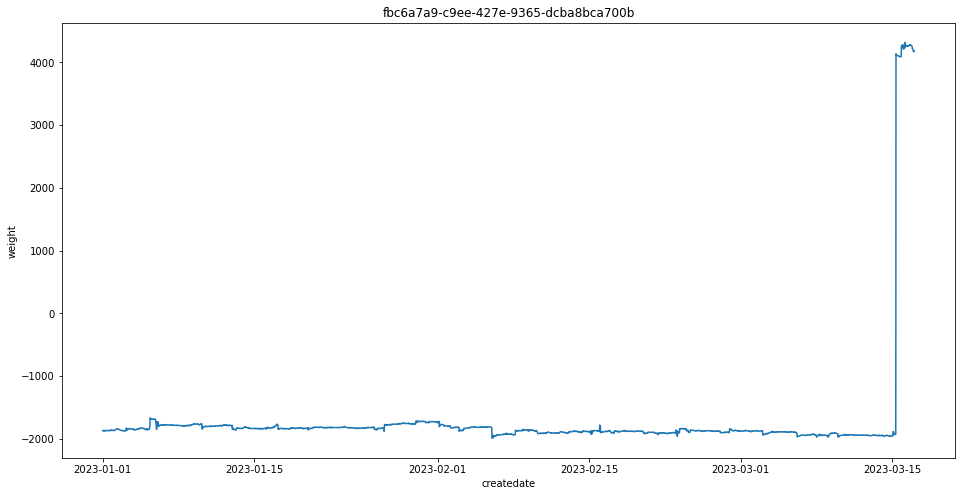

In [96]:
plt.figure(figsize=(16,8))
plt.plot(v5_l1_b1.createdat_ns, v5_l1_b1.weight)
plt.xlabel('createdate')
plt.title('fbc6a7a9-c9ee-427e-9365-dcba8bca700b')
plt.ylabel('weight')
plt.show()

In [97]:
v5_l1_b2 = v5_l1_b2.sort_values(["createdat_ns"],ascending= True)
v5_l1_b2.head()
# Do we only need to keep the most recent bins' records?

,iotid,bin,weight,battery,weightdiff,createdat_ns
3843686,lora-000208,eab19660-c934-43ef-aa7d-b9b9b7e7eec4,4182.497902,2982.986191,NaN,2023-03-17 02:01:00
2527629,lora-000208,eab19660-c934-43ef-aa7d-b9b9b7e7eec4,4209.964141,2982.986191,NaN,2023-03-17 02:31:00
1886091,lora-000208,eab19660-c934-43ef-aa7d-b9b9b7e7eec4,3981.078813,2982.986191,NaN,2023-03-17 03:01:00
886603,lora-000208,eab19660-c934-43ef-aa7d-b9b9b7e7eec4,3950.560769,2982.986191,NaN,2023-03-17 03:31:00
2075519,lora-000208,eab19660-c934-43ef-aa7d-b9b9b7e7eec4,3941.405356,2983.901732,NaN,2023-03-17 04:02:00


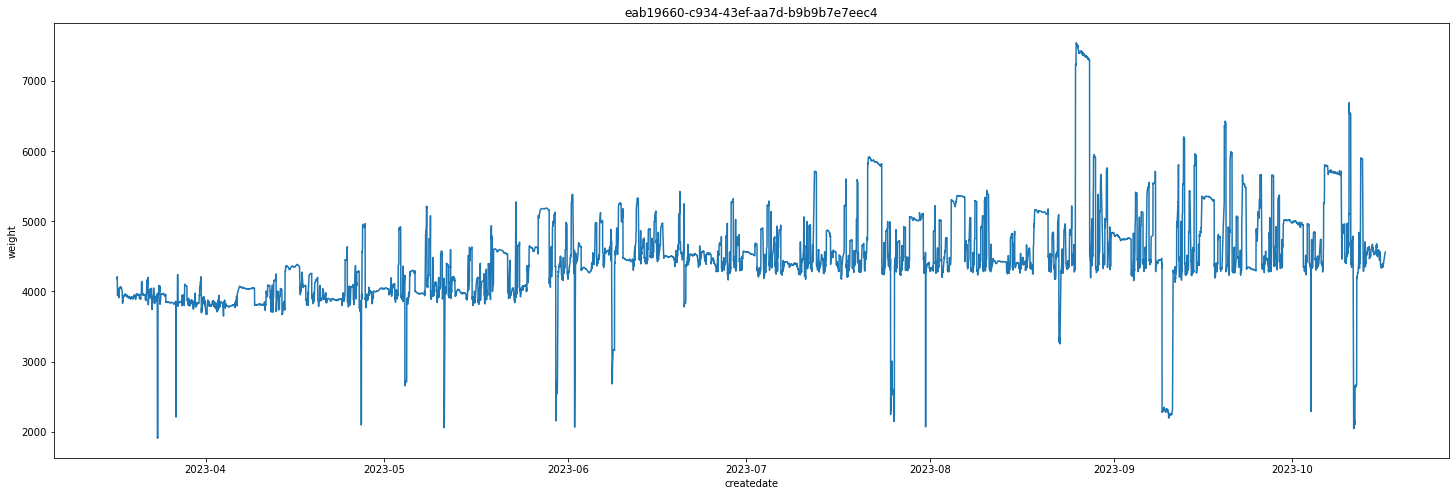

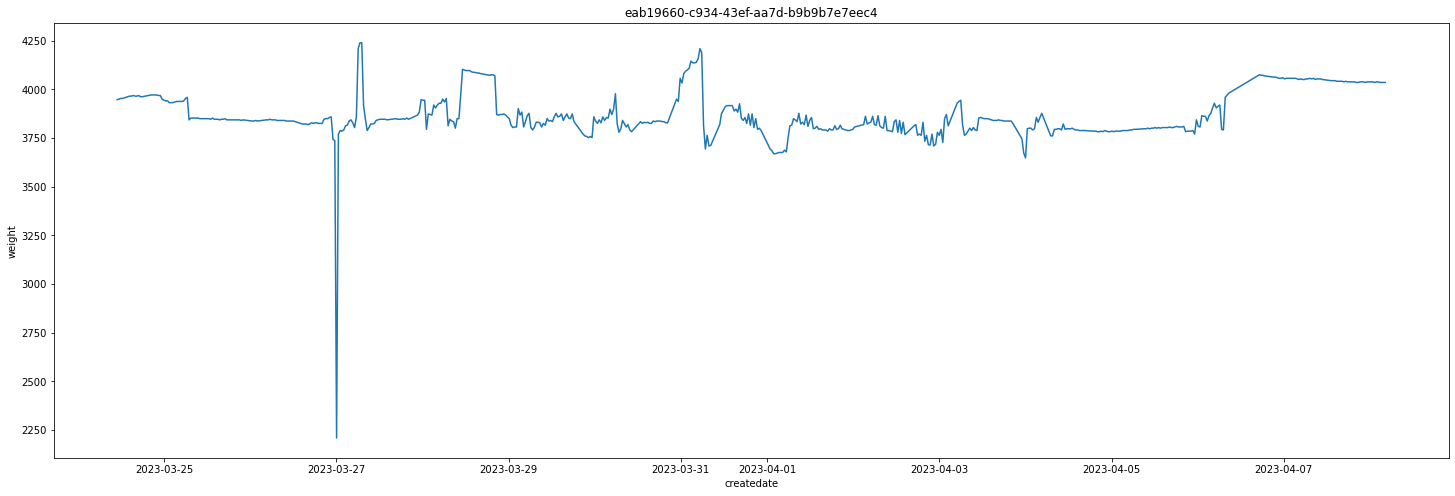

In [98]:
plt.figure(figsize=(25,8))
plt.plot(v5_l1_b2.createdat_ns, v5_l1_b2.weight)
plt.xlabel('createdate')
plt.title('eab19660-c934-43ef-aa7d-b9b9b7e7eec4')
plt.ylabel('weight')
plt.show()

plt.figure(figsize=(25,8))
plt.plot(v5_l1_b2.createdat_ns[300:900], v5_l1_b2.weight[300:900])
plt.xlabel('createdate')
plt.title('eab19660-c934-43ef-aa7d-b9b9b7e7eec4')
plt.ylabel('weight')
plt.show()



## Analyzing lora-000418

If one scale used in weighing 3 bins, how to caculate the signal-to-noise rato? Calculate the last one, or mean it?

In [99]:
v5_l2 = v5_1.loc[v5_1.iotid=='lora-000418']
v5_l2_b1 = v5_l2.loc[v5_l2.bin=='3d846cc5-fd15-44f5-88ba-5a5eecd24b03']
v5_l2_b2 = v5_l2.loc[v5_l2.bin=='e08fd2b4-024e-4637-a3e9-c2ff928dddf3']
v5_l2_b3 = v5_l2.loc[v5_l2.bin=='78fe51bf-21d0-4a8d-af40-fbd030c3142d']

In [100]:
v5_l2_b1 = v5_l2_b1.sort_values(["createdat_ns"],ascending= True)

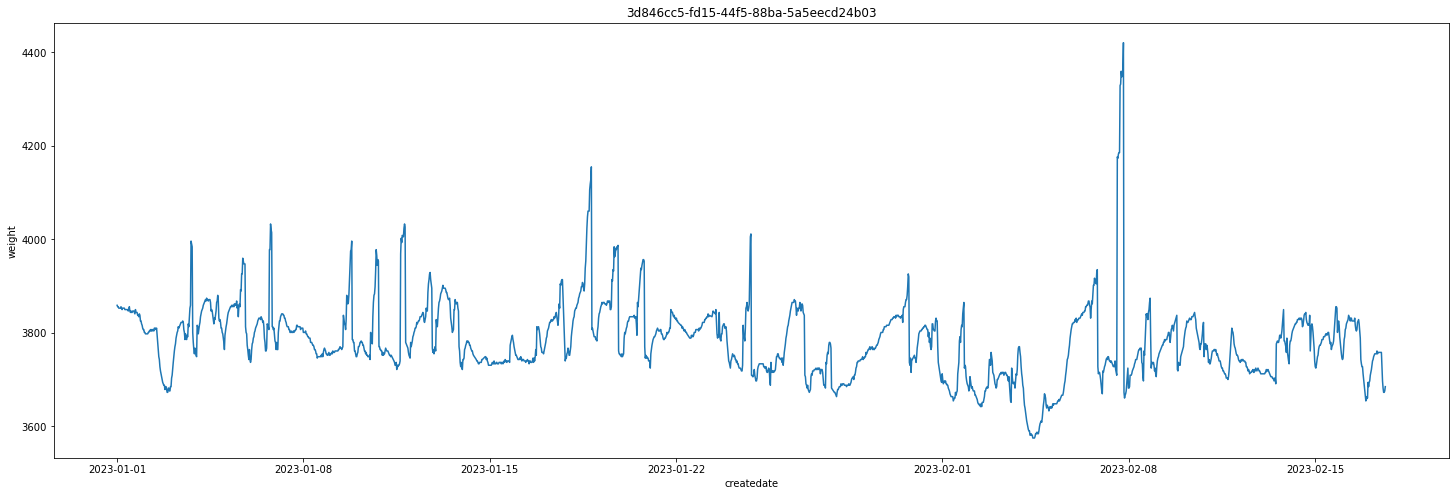

In [101]:
plt.figure(figsize=(25,8))
plt.plot(v5_l2_b1.createdat_ns, v5_l2_b1.weight)
plt.xlabel('createdate')
plt.title('3d846cc5-fd15-44f5-88ba-5a5eecd24b03')
plt.ylabel('weight')
plt.show()

In [102]:
v5_l2_b2 = v5_l2_b2.sort_values(["createdat_ns"],ascending= True)

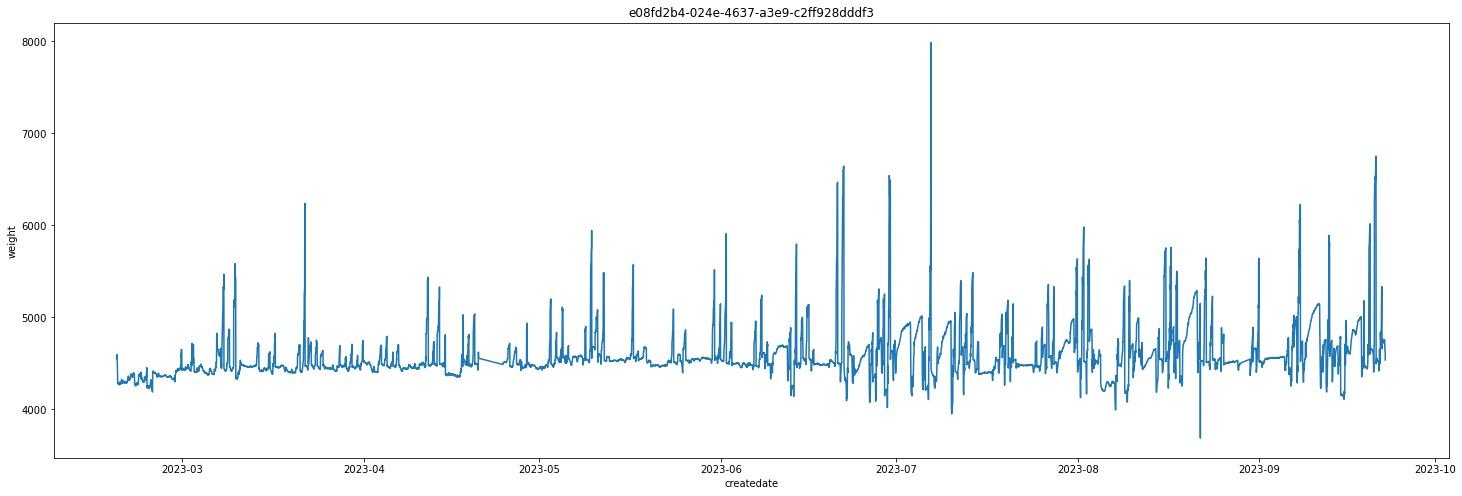

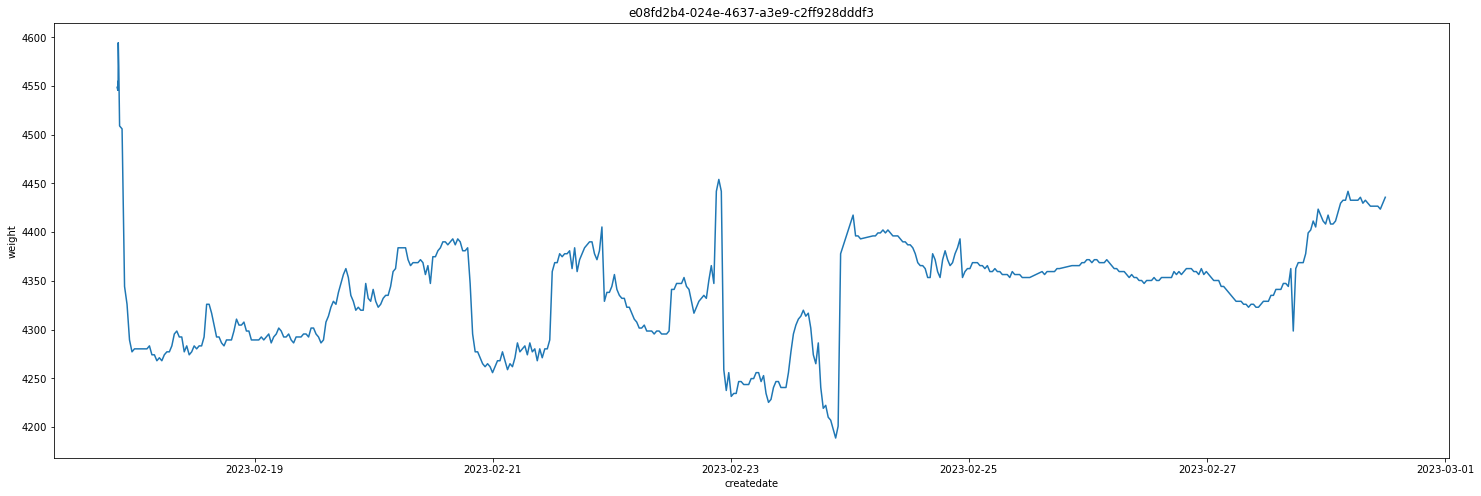

In [104]:
plt.figure(figsize=(25,8))
plt.plot(v5_l2_b2.createdat_ns, v5_l2_b2.weight)
plt.xlabel('createdate')
plt.title('e08fd2b4-024e-4637-a3e9-c2ff928dddf3')
plt.ylabel('weight')
plt.show()

plt.figure(figsize=(25,8))
plt.plot(v5_l2_b2.createdat_ns[:500], v5_l2_b2.weight[:500])
plt.xlabel('createdate')
plt.title('e08fd2b4-024e-4637-a3e9-c2ff928dddf3')
plt.ylabel('weight')
plt.show()

In [105]:
v5_l2_b3 = v5_l2_b3.sort_values(["createdat_ns"],ascending= True)

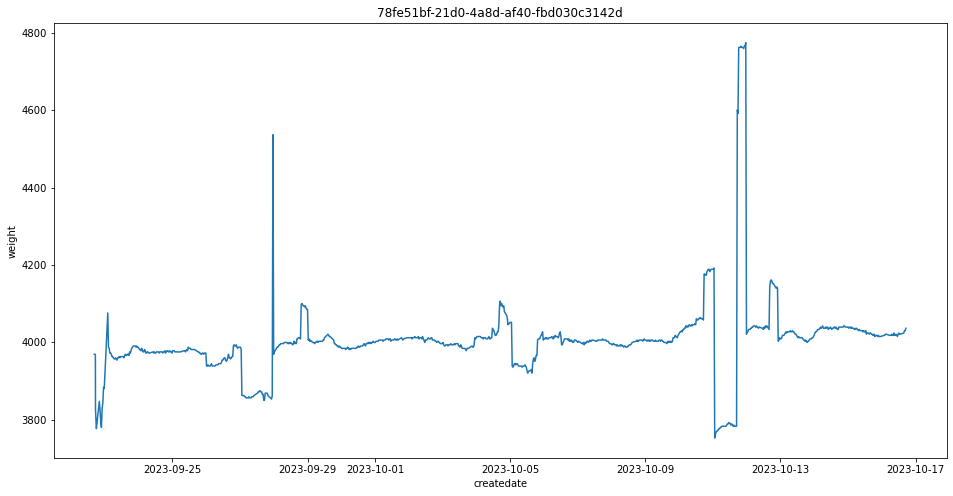

In [106]:
plt.figure(figsize=(16,8))
plt.plot(v5_l2_b3.createdat_ns, v5_l2_b3.weight)
plt.xlabel('createdate')
plt.title('78fe51bf-21d0-4a8d-af40-fbd030c3142d')
plt.ylabel('weight')
plt.show()

## Analyzing bin 002a3bdd-18b3-459f-9377-483249ccf9b6

In [107]:
v5.bin.value_counts()["002a3bdd-18b3-459f-9377-483249ccf9b6"]

1137

In [108]:
v5_bin1 = v5[:1137]

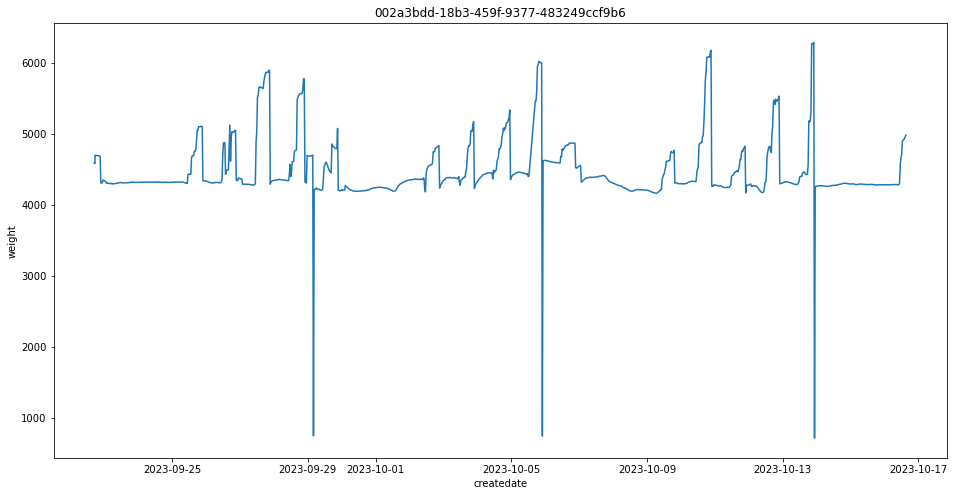

In [109]:
plt.figure(figsize=(16,8))
plt.plot(v5_bin1.createdat_ns, v5_bin1.weight)
plt.xlabel('createdate')
plt.title('002a3bdd-18b3-459f-9377-483249ccf9b6')
plt.ylabel('weight')
plt.show()

In [111]:
v5_bin1 = v5_bin1.assign(weightdiff = pd.Series(np.zeros(1137)))
v5_bin1 = v5_bin1.assign(interval = pd.Series(np.zeros(1137)))
v5_bin1.weightdiff = 0
v5_bin1.interval = 0
v5_bin1.head()

iotid  \
bin                                                          
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025  lora-001784   
                                     14314948  lora-001784   
                                     11002769  lora-001784   
                                     14184884  lora-001784   
                                     13520317  lora-001784   

                                                                                bin  \
bin                                                                                   
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     14314948  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     11002769  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     14184884  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     13520317  002a3bdd-18b3-459f-9377-483249ccf9b6   

                                                    weight      battery  \
bin                                                                       
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025  4588.387884  2948.348211   
                                     14314948  4588.387884  2949.874113   
                                     11002769  4585.336080  2947.737850   
                                     14184884  4588.387884  2957.808804   
                                     13520317  4585.336080  2941.023880   

                                               weightdiff        createdat_ns  \
bin                                                                             
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025           0 2023-09-22 17:02:00   
                                     14314948           0 2023-09-22 17:08:00   
                                     11002769           0 2023-09-22 17:13:00   
                                     14184884           0 2023-09-22 17:18:00   
                                     13520317           0 2023-09-22 17:23:00   

                                               interval  
bin                                                      
002a3bdd-18b3-459f-9377-483249ccf9b6 14712025         0  
                                     14314948         0  
                                     11002769         0  
                                     14184884         0  
                                     13520317         0

Text(0.5, 0, 'interval')

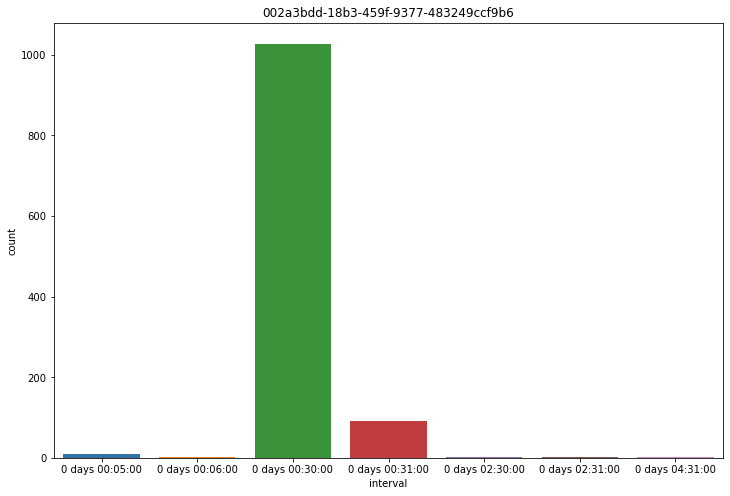

In [113]:
plt.figure(figsize=(12,8))
plt.title('002a3bdd-18b3-459f-9377-483249ccf9b6')
interval_1 = [v5_bin1.createdat_ns[i]-v5_bin1.createdat_ns[i-1] for i in range(1137)]
interval = np.unique(interval_1, return_counts=True)
sns.barplot(x=interval[0][1:],y=interval[1][1:])
plt.ylabel('count')
plt.xlabel('interval')
# 30 minute time-interval occurs the most